In [1]:
import torch
from torchvision import datasets, transforms
from config_loader import load_config, get_model_name

config = load_config("example_01")

BATCH_SIZE = config['data_params']['batch_size']

train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
val_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(config)

# this is the name that will be used to save the model checkpoint and also for logging.
model_name = get_model_name(config)
print(model_name)

{'model_class': 'VAE', 'model_params': {'x_dim': 784, 'h_dim1': 512, 'h_dim2': 256, 'z_dim': 2}, 'data_params': {'batch_size': 128}}
VAE(784_512_256_2)?batch_size=128


In [2]:
from trainers import ExtendedTrainer
from modules import BaseModule

model = BaseModule(model_class_name = config['model_class'], model_params = config['model_params'])

trainer = ExtendedTrainer(project_name="DataScienceCompetition2023", max_epochs = 10, model_name=model_name)
trainer.fit(model, train_loader, val_loader)
#save
trainer.save_model_checkpoint()

/Home/siv34/edzak2974/.conda/envs/pytorch2.1/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /Home/siv34/edzak2974/.conda/envs/pytorch2.1/lib/pyt ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('A100-SXM4-80GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable cod

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name  | Type | Params
-------------------------------
0 | model | VAE  | 1.1 M 
-------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.275     Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

/Home/siv34/edzak2974/.conda/envs/pytorch2.1/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=255` in the `DataLoader` to improve performance.


/Home/siv34/edzak2974/.conda/envs/pytorch2.1/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=255` in the `DataLoader` to improve performance.


Epoch 9: 100%|██████████| 469/469 [00:07<00:00, 64.99it/s, v_num=g9zq, train_loss=1.36e+4, train_BCE_loss=1.29e+4, train_KLD_loss=633.0, val_loss=1.84e+4, val_BCE_loss=1.76e+4, val_KLD_loss=814.0]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 469/469 [00:07<00:00, 61.67it/s, v_num=g9zq, train_loss=1.36e+4, train_BCE_loss=1.29e+4, train_KLD_loss=633.0, val_loss=1.84e+4, val_BCE_loss=1.76e+4, val_KLD_loss=814.0]


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇████
train_BCE_loss,█▅▄▄▃▃▂▃▃▄▂▂▂▂▃▂▂▂▃▂▂▂▂▂▂▂▂▂▁▂▂▂▁▂▁▂▁▁▂▂
train_KLD_loss,▁▅▆▆▆▆▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇████▇▇██████████
train_loss,█▅▄▄▃▄▂▃▃▄▂▂▃▂▃▂▂▂▃▂▂▂▂▂▂▂▂▂▁▂▂▂▁▂▁▂▁▁▂▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_BCE_loss,█▅▄▃▂▂▂▁▁▁
val_KLD_loss,▁▂▄▄▆▇▆██▇
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,9
train_BCE_loss,18550.57031
train_KLD_loss,816.36719


VAE(784_512_256_2)?batch_size=128
torch.Size([28, 28])


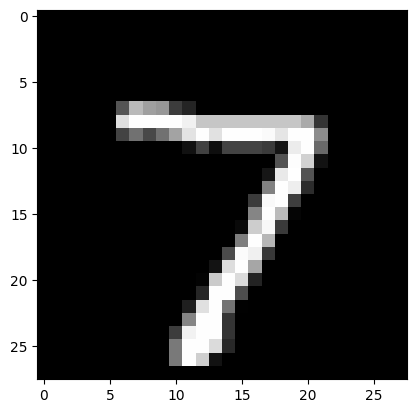

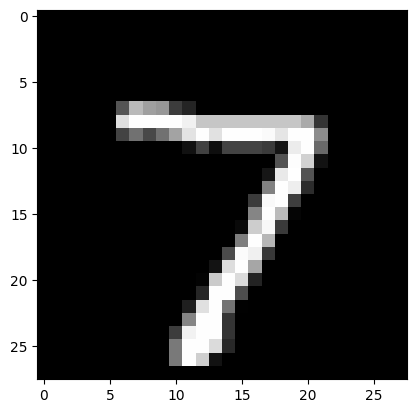

In [5]:
from modules import BaseModule
print(model_name)
model = BaseModule.load_model_checkpoint(model_name = model_name)
model.eval()

x, y = next(iter(val_loader))

recon, mu, logvar = model(x,y)

from matplotlib import pyplot as plt

recon = x[0].reshape(28,28)
print(recon.shape)
plt.imshow(x[0][0], cmap='gray')
plt.show()
plt.imshow(recon.detach().numpy(), cmap='gray')



In [1]:
import pandas as pd
abundance_df = pd.read_csv("./data/abundance_table.csv",index_col = 0)
meta_df = pd.read_csv("./data/env_parameter_sample.csv",index_col = 0)



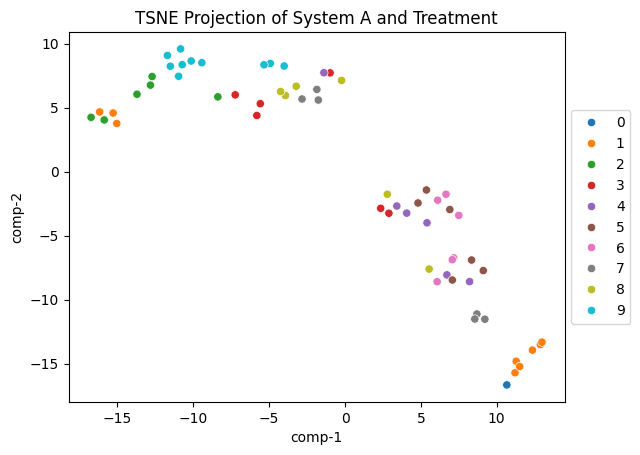

In [61]:
from sklearn.manifold import TSNE
import seaborn as sns
from utils.utils import get_by_system, get_by_timestep, get_by_treatment, get_replicates
import numpy as np

new_df = get_by_system(abundance_df, 'B')
y = new_df['Treatment'].values
new_df = new_df.values[:,:-4]

tsne_proj = TSNE(n_components=2, learning_rate='auto',init='random', random_state=42, perplexity=10).fit_transform(new_df)
#y = abundance_df['Aquaculture System'].values

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = tsne_proj[:,0]
df["comp-2"] = tsne_proj[:,1]

tsne_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("tab10", 10),
                data=df)
tsne_plot.set_title("TSNE Projection of System B and Treatment")
tsne_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
tsne_fig = tsne_plot.get_figure()
tsne_fig.savefig("./plots/TSNE_SystemB_Treatment")



In [ ]:
abun

In [9]:
abundance_df.values[:,:-4]

array([[0.0, 0.0, 0.0, ..., 0.0, 99.93, 0.07],
       [0.05, 0.05, 0.05, ..., 0.0, 33.83, 66.17],
       [0.05, 0.05, 0.05, ..., 0.01, 29.55, 70.45],
       ...,
       [0.02, 0.02, 0.02, ..., 0.01, 17.72, 82.28],
       [0.03, 0.03, 0.03, ..., 0.0, 17.49, 82.51],
       [0.03, 0.03, 0.03, ..., 0.0, 17.3, 82.7]], dtype=object)